#### 本文参考[这里](https://mp.weixin.qq.com/s/BYZI9FfA_jy3M3smijtvkA)

### 时间序列的组成

1. 等级 如果系列是直线，则为该系列的基线值。
2. 趋势 系列随时间的可选且通常线性增加或减少的行为。
3. 季节性 随着时间的推移，可选的重复模式或行为循环。
4. 噪音 模型无法解释的观测值中的可选变异性。

所有的时间序列都有一个等级，即序列是线性的还是非线性的等。因为受到外界不同因素的影响因此多多少少都会有噪音（抑或是这些噪音是未被考虑进去的因子）。

### 经典的时间序列预测算法

#### 自回归 Auto Regression

在自回归中

In [37]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
import seaborn as sns

sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc("figure", figsize=(16, 6))
sns.mpl.rc("font", size=14)

%matplotlib inline

In [8]:
raw_data = pd.read_csv("./etf.csv", header=None, parse_dates=[0])
raw_data.head()
raw_data.columns=["date","price","_"]
raw_data.set_index("date",inplace=True)
raw_data.sort_index(ascending=True, inplace=True)
data = raw_data[["price"]].copy()
data.head(10)


,price
date,
2018-04-24,1.0000
2018-04-25,0.9950
2018-04-26,0.9769
2018-04-27,0.9773
2018-05-02,0.9788
2018-05-03,0.9859
2018-05-04,0.9821
2018-05-07,0.9968
2018-05-08,1.0075


In [46]:
# auto regression
from statsmodels.tsa.ar_model import AutoReg

# lags: 表示当前时刻的时序信号会受到多少过去时刻的时序信号的影响
model = AutoReg(data, lags=[1,3,7], old_names=False)
model_fit = model.fit()
yhat = model_fit.predict(len(data)-10, len(data)+10) # 从哪个数据点开始， 向后预测几个数据点
# model_fit.params # 偏差， 一个时间片之前数据的影响， 3个时间片之前数据的影响，7个时间片之前数据的影响

d:\1Software\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
d:\1Software\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
d:\1Software\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


In [69]:
date_index = pd.date_range("2022-06-12", periods=21)


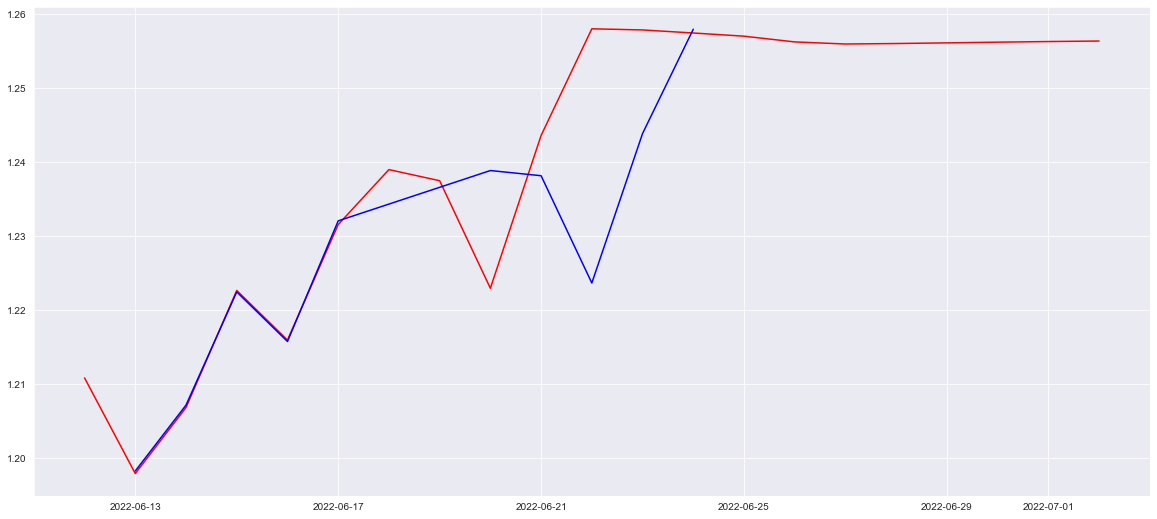

In [70]:
#yhat, data

fig, ax = plt.subplots(figsize=(20, 9))
ax.plot(date_index, yhat.values, 'r')
ax.plot(data.index[-10:], data.price[-10:], 'b')
plt.show()

In [29]:
yhat.values

array([1.21077716, 1.19785043, 1.20676693, 1.22259638, 1.21588727,
       1.23149761, 1.23892802, 1.23742543, 1.22288919, 1.24353948,
       1.25795523])

In [43]:
data.tail(11).price

date
2022-06-10    1.2115
2022-06-13    1.1982
2022-06-14    1.2071
2022-06-15    1.2224
2022-06-16    1.2157
2022-06-17    1.2320
2022-06-20    1.2388
2022-06-21    1.2381
2022-06-22    1.2236
2022-06-23    1.2438
2022-06-24    1.2579
Name: price, dtype: float64

In [99]:
x = np.random.random((100, 2))
x = sm.add_constant(x)
b = [1, .1, .5]
e = np.random.random(100)

y = np.dot(x,b) + e

In [76]:
import statsmodels.api as sm


In [101]:
results = sm.OLS(y, x).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     16.05
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           9.55e-07
Time:                        19:01:53   Log-Likelihood:                -20.175
No. Observations:                 100   AIC:                             46.35
Df Residuals:                      97   BIC:                             54.16
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4237      0.077     18.602      0.000       1.272       1.576
x1             0.1430      0.100      1.424      0.158      -0.056       0.342
x2             0.5800      0.108      5.385      0.000       0.366       0.794
==============================================================================
Omnibus:                       45.741   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.763
Skew:                           0.081   Prob(JB):                       0.0340
Kurtosis:                       1.736   Cond. No.                         5.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
results.params

array([1.42365596, 0.14297434, 0.57995379])

(array([[32, 38],
        [32, 38]]),
 array([[32, 38],
        [32, 38]]))

In [98]:
y

array([[4, 5],
       [5, 6],
       [6, 7]])